In [163]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import random

import matplotlib.pyplot as plt

# Part 1

In [164]:
df = pd.read_csv('cleveland.csv')

df = df.rename({'num':'disease'}, axis=1)
df['disease'] = df.disease.apply(lambda x: min(x, 1))

In [165]:
df['age_s'] = (df.age-df.age.mean())/df.age.std()
df['trestbps_s'] = (df.trestbps-df.trestbps.mean())/df.trestbps.std()
df['chol_s'] = (df.chol - df.chol.mean()) / df.chol.std()
df['thalach_s'] = (df.thalach - df.thalach.mean()) / df.thalach.std()
df['fbs_s'] = (df.fbs - df.fbs.mean()) / df.fbs.std()

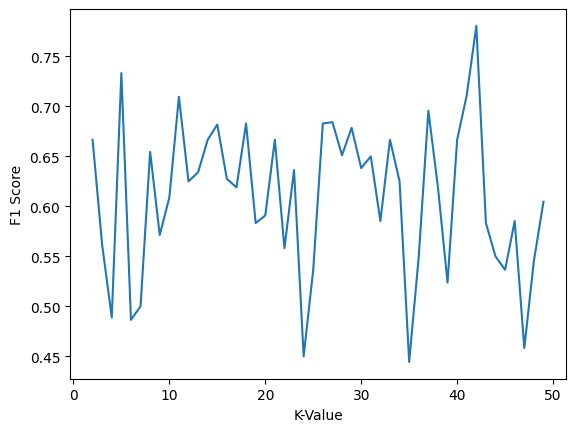

In [168]:
def get_scores(k):
    nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

    X = df[['age_s', 'trestbps_s', 'chol_s', 'thalach_s', 'fbs_s']].values
    fit = nn.fit(X)

    n = 50

    patients = df.sample(n)
    patientsX = patients[['age_s', 'trestbps_s', 'chol_s', 'thalach_s', 'fbs_s']].values
    patientsY = patients[['disease']].values
    
    distances, indices = fit.kneighbors(patientsX)

    y_pred = []
    for i in range(n):
        nbrs = df.iloc[indices[i]]
        nbrs = nbrs.drop(patients.index[i], errors='ignore')
    
        healthy = nbrs[nbrs.disease == 0].count().disease
        sick = nbrs[nbrs.disease == 1].count().disease
        predict = 0 if (healthy > sick) else 1
    
        y_pred.append(predict)
    
    return precision_recall_fscore_support(patientsY, y_pred, labels=[1])

kvals = range(2, 50)
scores = [get_scores(k) for k in kvals]

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])
plt.xlabel("K-Value")
plt.ylabel("F1 Score")
plt.savefig("kvalue.pdf")

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

k = 30
nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

X = df[['age_s', 'trestbps_s', 'chol_s', 'thalach_s', 'fbs_s']].values
y = df[['disease']].values

precision, recall, f1 = [], [], []

for x in range(20):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

    fit = nn.fit(X_train)

    y_pred = []

    distances, indices = fit.kneighbors(X_test)

    for i in range(len(y_test)):
        # print('nearest neighbors to patient: {}:'.format(patientsX[i]))
        nbrs = y_train[indices[i]]
        # Drop the patient of interest
        currentPatient = y_test[i][0]

        healthy = 0
        sick = 0
        for j in range(len(nbrs) - 1):
            if nbrs[j] == 0:
                healthy += 1
            elif nbrs[j] == 1:
                sick += 1
        predict = 0 if (healthy > sick) else 1
        y_pred.append(predict)
        
    (p, r, f, s) = precision_recall_fscore_support(y_test, y_pred)
    
    precision.append(p)
    recall.append(r)
    f1.append(f)

print("Precision Scores:")
print(precision)
print("Recall Scores:")
print(recall)
print("F1 Scores:")
meanF1 = sum(f1) / len(f1)
print("Mean F1 Score: " + str(meanF1))

[0.47058824 0.64285714] [0.61538462 0.5       ] [0.53333333 0.5625    ]
[0.92857143 0.47058824] [0.59090909 0.88888889] [0.72222222 0.61538462]
[0.64705882 0.78571429] [0.78571429 0.64705882] [0.70967742 0.70967742]
[0.57142857 0.7       ] [0.8    0.4375] [0.66666667 0.53846154]
[0.57894737 0.66666667] [0.73333333 0.5       ] [0.64705882 0.57142857]
[0.82352941 0.71428571] [0.77777778 0.76923077] [0.8        0.74074074]
[0.68421053 0.33333333] [0.61904762 0.4       ] [0.65       0.36363636]
[0.47368421 0.66666667] [0.69230769 0.44444444] [0.5625     0.53333333]
[0.68421053 0.5       ] [0.68421053 0.5       ] [0.68421053 0.5       ]
[0.63157895 0.41666667] [0.63157895 0.41666667] [0.63157895 0.41666667]
[0.5        0.76923077] [0.75       0.52631579] [0.6   0.625]
[0.8        0.54545455] [0.76190476 0.6       ] [0.7804878  0.57142857]
[0.94444444 0.76923077] [0.85       0.90909091] [0.89473684 0.83333333]
[0.52380952 0.5       ] [0.6875     0.33333333] [0.59459459 0.4       ]
[0.5652173